In [90]:
import numpy as np
import PIL
import torch
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

from datasets.data_io_lib import LIDC_IDRI, IMAGE_KEY, GROUND_TRUTH_KEY
from datasets.dataset_lib import Dataset
import matplotlib.pyplot as plt
import glob

In [91]:
path = 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian'
save_path = 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian'
dataset = LIDC_IDRI('C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\LIDC', 'test')
# dataset.idx2 = 0
test_files = glob.glob(path+"\\quantities"+"\\*probs.npy")
print(test_files)
os.makedirs(save_path, exist_ok=True)

['C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-102.0_c0_16_probs.npy', 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-104.5_c0_16_probs.npy', 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-107.0_c0_16_probs.npy', 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-37.0_c0_16_probs.npy', 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-39.5_c0_16_probs.npy', 'C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\MUE\\eval_99_epoch\\LIDC_IDRI_Gaussian\\quantities\\LIDC-IDRI-0007@z-42.0_c0_16_probs.npy', 'C:\\Users\\gli\\O

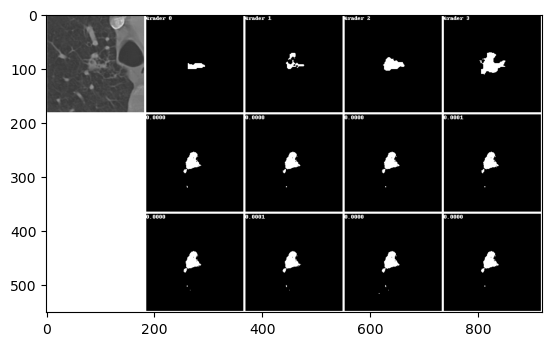

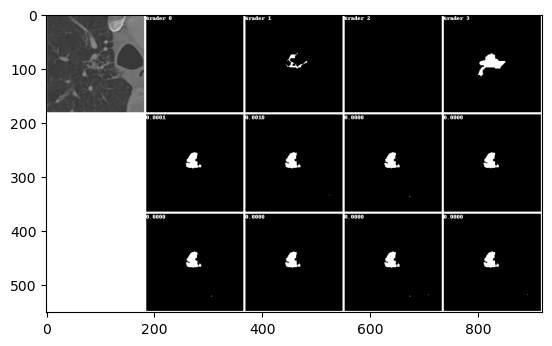

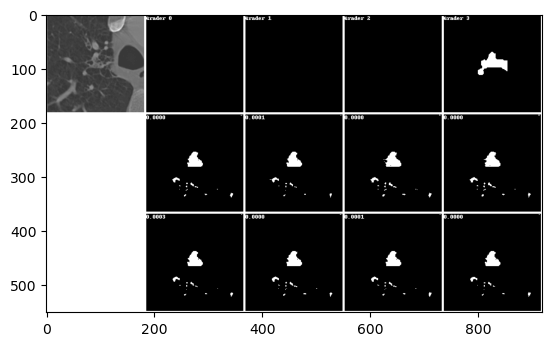

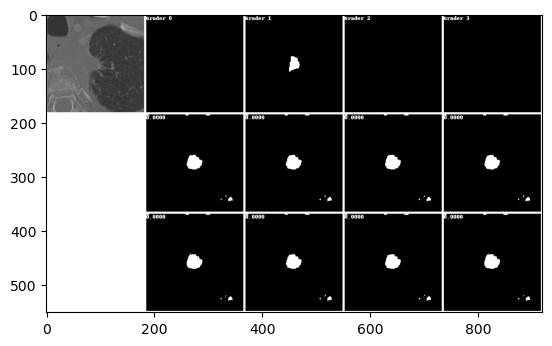

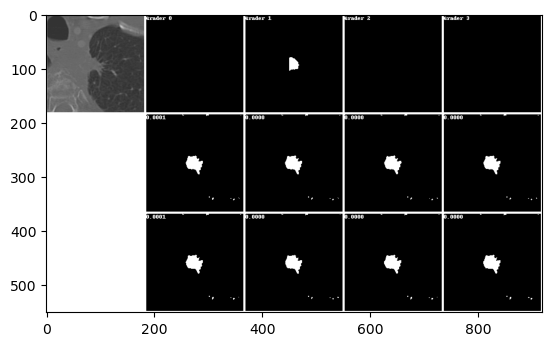

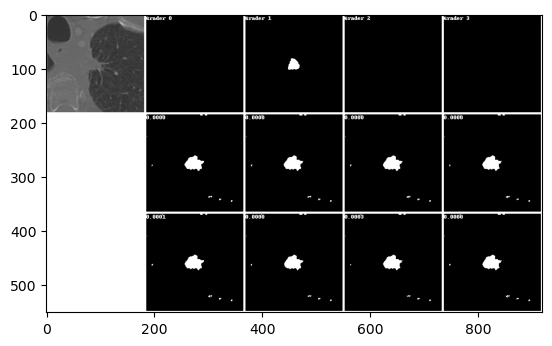

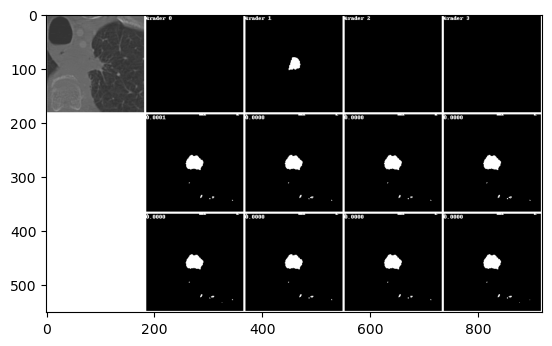

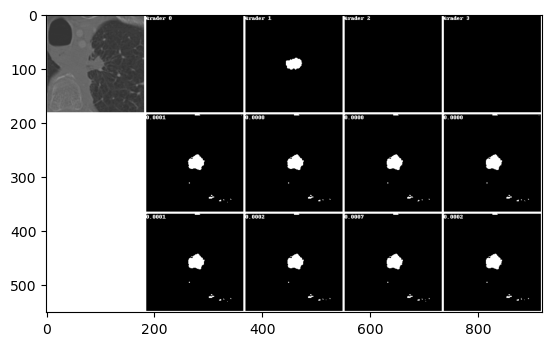

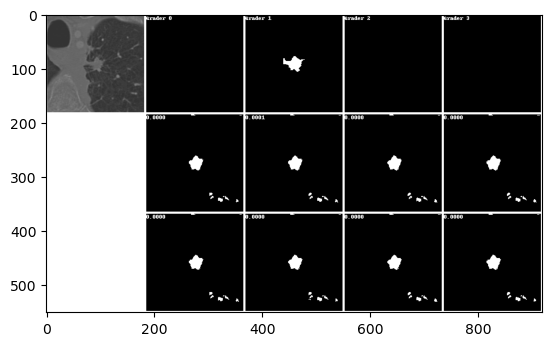

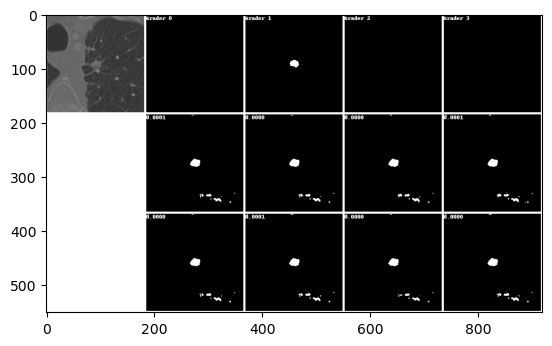

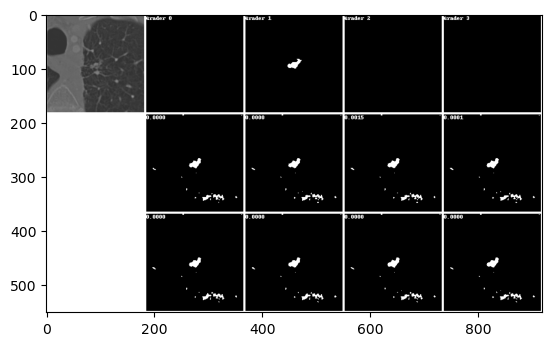

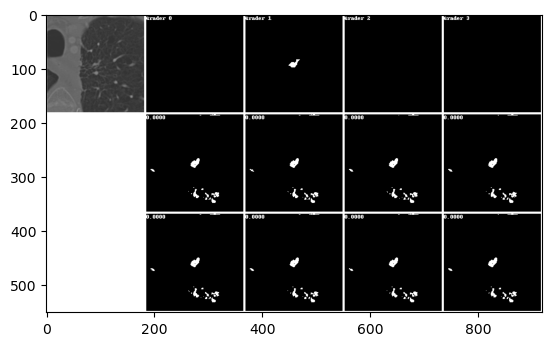

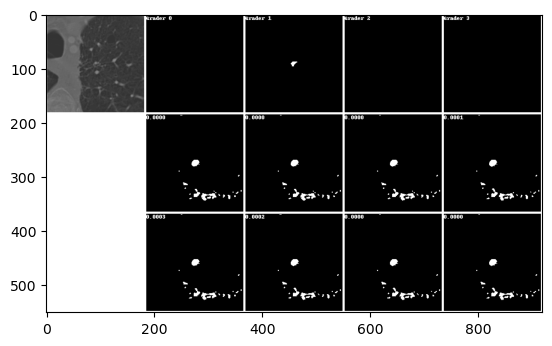

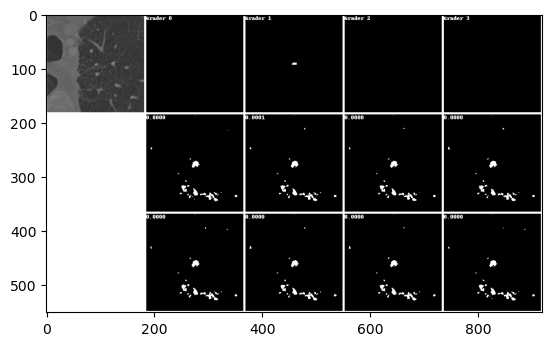

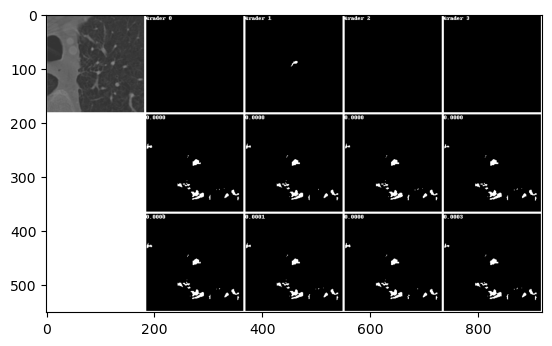

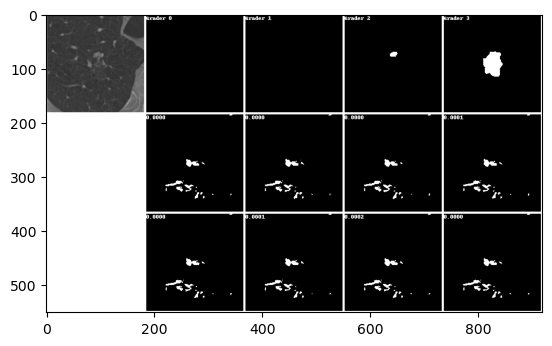

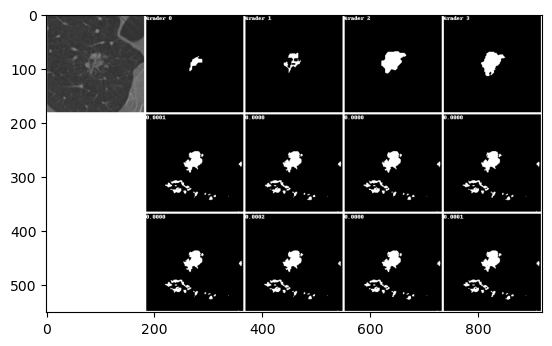

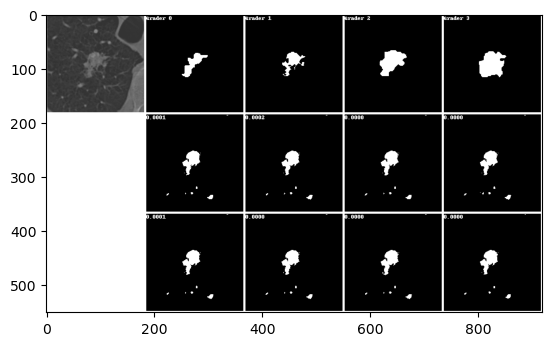

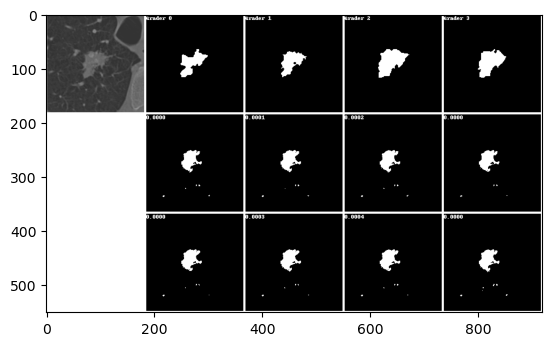

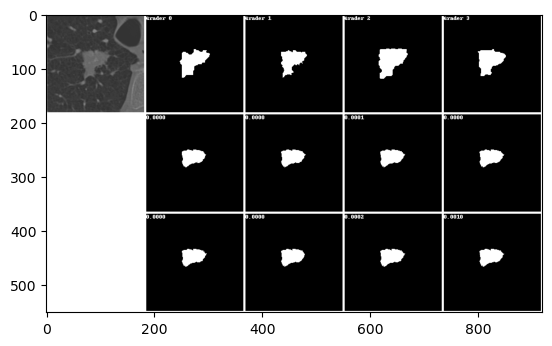

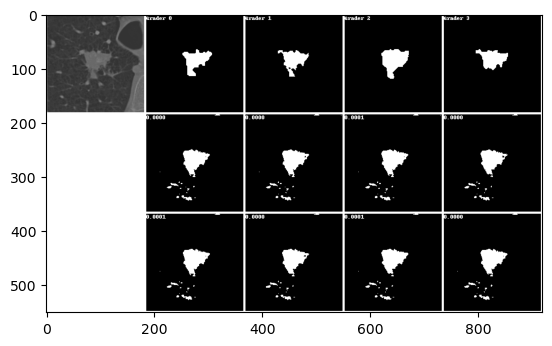

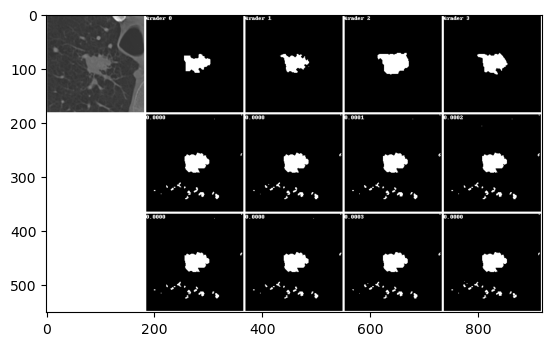

In [92]:
sample_num = 8
    
# font = ImageFont.truetype("/home/syl/Documents/Doc/open-sans/OpenSans-Bold.ttf", 20)

for ii, file in enumerate(test_files):
    img_key = os.path.basename(file).replace("_16_probs.npy", "")
    samples = np.load(file.replace("probs.npy", "samples.npy").replace("quantities", "images"))
#     print(samples.shape)
    probs = np.squeeze(np.squeeze(np.load(file), axis=2), axis=0)

    # plt.imshow(datadict['img'][0,...])
    # plt.show()
    # gt_modes = np.concatenate([np.pad(datadict['gt_modes'][i,...], ((2,2),(2,2)), constant_values=1) for i in range(4)], axis=1)
    # data_arr = np.concatenate([np.pad(datadict['img'][0,...], ((2,2),(2,2)), constant_values=1), gt_modes], axis= 1)
    gt_modes_dict = dataset.get_gt_modes(img_key)

    gt_modes = []
    for j in range(4):
        tmp = gt_modes_dict['gt_modes'][j,...] * 255.
        tmp = Image.fromarray(tmp) 
        draw = ImageDraw.Draw(tmp)
        draw.text((0, 0),"Grader {}".format(j),255)#,font=font)
        tmp = np.array(tmp)/255.
        tmp = np.pad(np.array(tmp), ((2,2),(2,2)), constant_values=1)
        gt_modes.append(tmp)



    data_arr = np.concatenate([np.pad(gt_modes_dict['img'][0,...], ((2,2),(2,2)), constant_values=1), *gt_modes], axis= 1)

    sample_arr_row1 = []
    sample_arr_row2 = []

    white = np.ones([184, 184])
    sample_arr_row1.append(white)
    sample_arr_row2.append(white)

    for i in range(0, sample_num//2):
        
        sample = samples[i, 0, 0,...]*255.
        sample = Image.fromarray(sample)
        prob = probs[i]
       
        draw = ImageDraw.Draw(sample)
    #     # font = ImageFont.truetype(<font-file>, <font-size>)
    #     font = ImageFont.truetype("sans-serif.ttf", 16)
    #     # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0),"{:.4f}".format(prob), 255)#,font=font)
        sample = np.array(sample)/255.
        sample = np.pad(np.array(sample), ((2,2),(2,2)), constant_values=1)
        sample_arr_row1.append(sample)


    for i in range(sample_num//2, sample_num):
        sample = samples[i, 0, 0,...]*255.
        sample = Image.fromarray(sample)
        prob = probs[i]
    #     print(prob)
        draw = ImageDraw.Draw(sample)
    #     # font = ImageFont.truetype(<font-file>, <font-size>)
    #     font = ImageFont.truetype("sans-serif.ttf", 16)
    #     # draw.text((x, y),"Sample Text",(r,g,b))
        draw.text((0, 0),"{:.4f}".format(prob),255)#,font=font)
        sample = np.array(sample)/255.
        sample = np.pad(np.array(sample), ((2,2),(2,2)), constant_values=1)
        sample_arr_row2.append(sample)

    sample_arr_row1 = np.concatenate(sample_arr_row1, axis=1)
    sample_arr_row2 = np.concatenate(sample_arr_row2, axis=1)

#     print(sample_arr_row1.shape)
    final_image = np.concatenate([data_arr, sample_arr_row1, sample_arr_row2], axis=0)
#     fig = plt.figure(figsize = (10,10)) 
    plt.imshow(final_image, cmap='gray')
    plt.show()
    
#     plt.imsave(save_path + '{}_{}sample.png'.format(img_key, sample_num), final_image, cmap='gray')

    if ii > 20:
        break

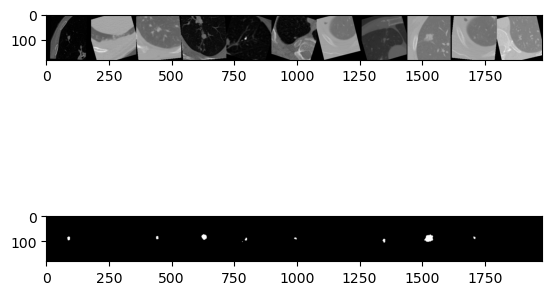

In [76]:
dataset_param = {
      "dataset_name": "LIDC_IDRI",
      "data_path_root": "C:\\Users\\gli\\OneDrive - The Chinese University of Hong Kong\\Code\\LIDC",
      "split": "test",
      "random_crop_size": ([160, 200]),
      "random_height_width_ratio_range": ([0.8, 1.25]),
      "random_rotate_angle_range": ([-20, 20]),
      "use_random_flip": True,
      "is_training": False,
      "has_ground_truth": True
  }
dataset_aug = Dataset(**dataset_param)
test_loader = torch.utils.data.DataLoader(dataset_aug,
                                        batch_size=1,
                                        shuffle=True,
                                        num_workers=4,
                                        pin_memory=True,
                                        sampler=None)
input_image_array = []
gt_image_array = []
for i, batch in enumerate(test_loader):
    inputs = batch[IMAGE_KEY]
#     inputs = Image.fromarray(inputs)
    input_image_array.append(np.squeeze(np.squeeze(inputs, axis=1), axis=0))
    ground_truth = batch[GROUND_TRUTH_KEY]
    gt_image_array.append(np.squeeze(np.squeeze(ground_truth, axis=1), axis=0))
    if i>9:
        break

input_image_array1 = np.concatenate(input_image_array, axis=1)
gt_image_array1 = np.concatenate(gt_image_array, axis=1) 
plt.subplot(2, 1, 1)
plt.imshow(input_image_array1, cmap='gray')
plt.subplot(2, 1, 2)
plt.imshow(gt_image_array1, cmap='gray')
plt.show()